In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from sklearn.metrics import classification_report
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

## Import Digits

### Load labels train & test

In [3]:
y_train = np.loadtxt("../train_labels.txt",dtype=str)
y_test = np.loadtxt("../test_labels.txt",dtype=str)

### Load data train & test

In [4]:
filenames_train = [x for x in os.listdir("../train_voyelles") if x[0]=="v"]
filenames_train.sort()
filenames_test = [x for x in os.listdir("../test_voyelles") if x[0]=="v"]
filenames_test.sort()

In [5]:
x_train = []
for f in filenames_train:
  input = np.loadtxt("../train_voyelles/"+f, dtype='i', delimiter='\t')
  x_train.append(input)
x_train = np.asarray(x_train)

In [6]:
x_test = []
for f in filenames_test:
  input = np.loadtxt("../test_voyelles/"+f, dtype='i', delimiter='\t')
  x_test.append(input)
x_test = np.asarray(x_test)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4500, 18, 18)
(4500,)
(500, 18, 18)
(500,)


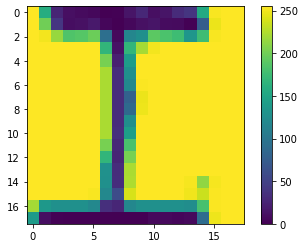

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Neural Network for images classification

### Preprocess train and test labels

In [9]:
train_labels = ['A', 'E', 'I', 'O', 'U'] 
# We follow the alphabetic order : A:0, E:1, I:2, O:3, U:4

In [10]:
y_train_numeric = [0 if elem == 'A' else 1 if elem == 'E' else 2 if elem == 'I' else 3 if elem == 'O' else 4 for elem in y_train]

In [11]:
y_test_numeric = [0 if elem == 'A' else 1 if elem == 'E' else 2 if elem == 'I' else 3 if elem == 'O' else 4 for elem in y_test]

### Preprocess training set and test set

In [12]:
x_train = x_train / 255.0

x_test = x_test / 255.0

### Setup Neural Network

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(18, 18)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

### Compile Model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [24]:
model.fit(x_train, np.asarray((y_train_numeric)), epochs=10)

Epoch 1/10
141/141 [==============================] - 0s 2ms/step - loss: 0.9489 - accuracy: 0.6616
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8587
Epoch 3/10
141/141 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8751
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8831
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8978
Epoch 6/10
141/141 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.9056
Epoch 7/10
141/141 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.9098
Epoch 8/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9116
Epoch 9/10
141/141 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.9238
Epoch 10/10
141/141 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.9260

### Evaluate Model Performance

In [25]:
test_loss, test_acc = model.evaluate(x_test, np.asarray((y_test_numeric)), verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 0.2422 - accuracy: 0.9180 - 101ms/epoch - 6ms/step

Test accuracy: 0.9179999828338623


### Test performance

In [26]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(x_test)

In [28]:
predictions[0]

array([7.4151707e-05, 6.1209336e-02, 9.3124509e-01, 5.6720623e-03,
       1.7994001e-03], dtype=float32)

In [29]:
np.argmax(predictions[0])

2

In [30]:
y_test_numeric[0]

2

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

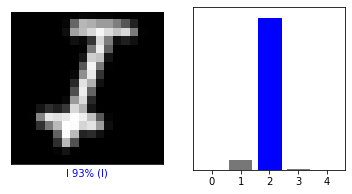

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

### Some errors

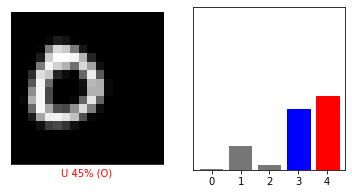

In [33]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

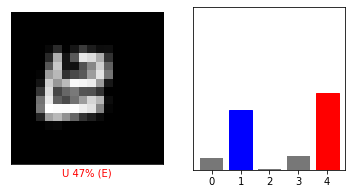

In [34]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

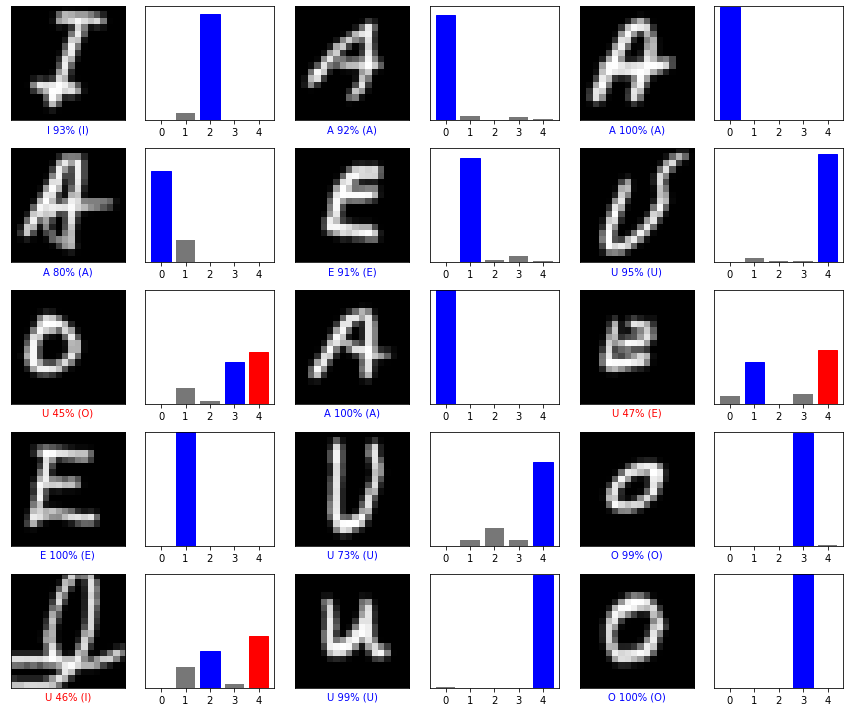

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_numeric, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_numeric)
plt.tight_layout()
plt.show()

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
def get_preds(predictions, class_labels):
    labelled_predictions = []
    for preds in predictions:
        max_pred = np.argmax(preds)
        label = class_labels[max_pred]
        labelled_predictions.append(label)
    return labelled_predictions

In [38]:
preds = get_preds(predictions, train_labels)

In [39]:
cm = confusion_matrix(y_test, preds, labels=['A', 'E', 'I', 'O', 'U'])

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'E', 'I', 'O', 'U'])

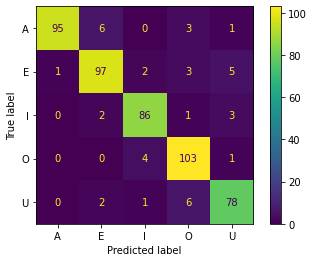

In [41]:
disp.plot()

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           A       0.99      0.90      0.95       105
           E       0.91      0.90      0.90       108
           I       0.92      0.93      0.93        92
           O       0.89      0.95      0.92       108
           U       0.89      0.90      0.89        87

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



## Convolutionnal Neural Network for images classification

In [43]:
from tensorflow.keras import datasets, layers, models

In [44]:
x_train.shape

(4500, 18, 18)

### Model Architecture

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(18, 18, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

### Add dense layer for classification

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 64)               

### Compile Model 

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [52]:
history = model.fit(x_train, np.asarray((y_train_numeric)), epochs=10, 
                    validation_data=(x_test, np.asarray((y_test_numeric))))

Epoch 1/10
141/141 [==============================] - 2s 8ms/step - loss: 0.8464 - accuracy: 0.6596 - val_loss: 0.1814 - val_accuracy: 0.9420
Epoch 2/10
141/141 [==============================] - 1s 6ms/step - loss: 0.1349 - accuracy: 0.9564 - val_loss: 0.0773 - val_accuracy: 0.9740
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0777 - accuracy: 0.9744 - val_loss: 0.0757 - val_accuracy: 0.9780
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 5/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0934 - val_accuracy: 0.9760
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0342 - accuracy: 0.9902 - val_loss: 0.0613 - val_accuracy: 0.9820
Epoch 7/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0544 - val_accuracy: 0.9820
Epoch 

### Evaluate the model

16/16 - 0s - loss: 0.0599 - accuracy: 0.9820 - 44ms/epoch - 3ms/step


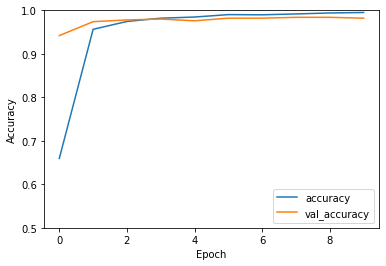

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  np.asarray((y_test_numeric)), verbose=2)

In [54]:
print(test_acc)

0.9819999933242798


In [55]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(x_test)

In [57]:
predictions[0]

array([5.3436463e-07, 8.7623924e-08, 9.9999797e-01, 1.2468392e-07,
       1.2720441e-06], dtype=float32)

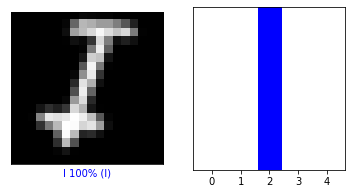

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

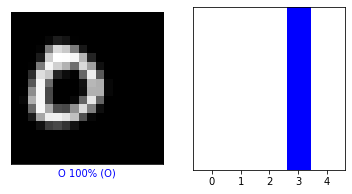

In [59]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

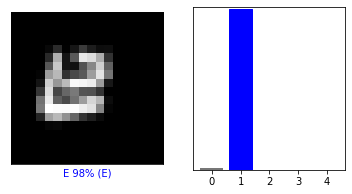

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

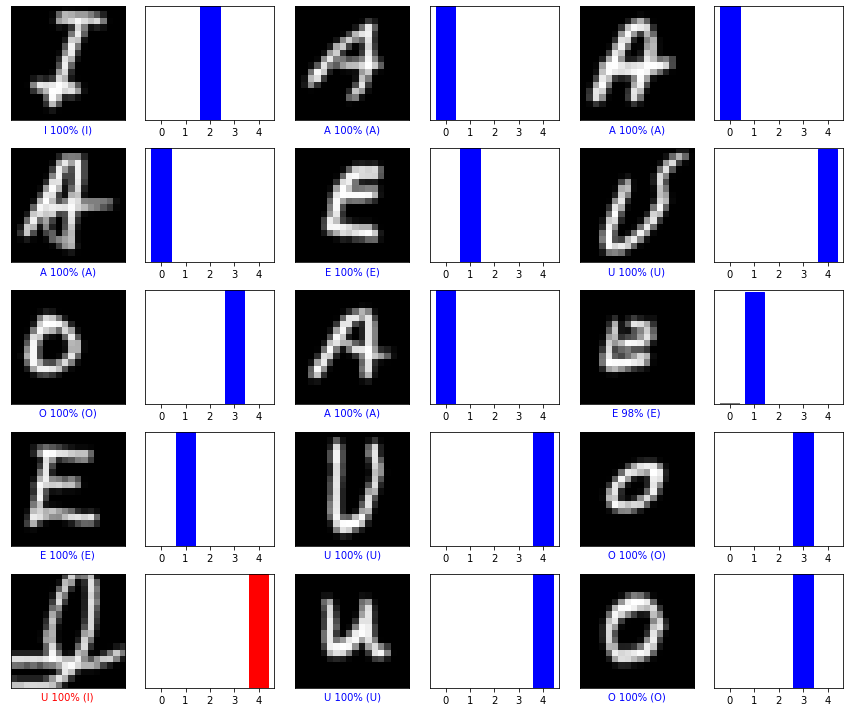

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_numeric, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_numeric)
plt.tight_layout()
plt.show()

In [62]:
preds = get_preds(predictions, train_labels)

In [63]:
cm = confusion_matrix(y_test, preds, labels=['A', 'E', 'I', 'O', 'U'])

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'E', 'I', 'O', 'U'])

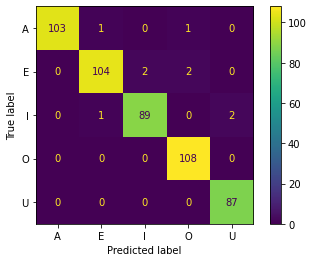

In [65]:
disp.plot()

In [66]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       105
           E       0.98      0.96      0.97       108
           I       0.98      0.97      0.97        92
           O       0.97      1.00      0.99       108
           U       0.98      1.00      0.99        87

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

